# CP5


## CP5 de Machine Learning - Previsão de Valor de Casas

O objetivo deste CP5 é desenvolver um modelo de regressão utilizando machine learning para prever a coluna median_house_value, que representa o valor mediano das casas na região. Vocês deverão utilizar o dataset housing.csv e seguir o processo completo de modelagem, desde a remoção de outliers até a construção e avaliação do modelo.

**Descrição do Dataset:**
O dataset contém dados de diferentes regiões residenciais na Califórnia, com diversas características relacionadas à população, moradia e localização geográfica. Abaixo está a descrição de cada coluna:

- **longitude:** Longitude da localização da região (em graus). Representa a coordenada geográfica da longitude.

- **latitude:** Latitude da localização da região (em graus). Representa a coordenada geográfica da latitude.

- **housing_median_age:** Idade mediana das casas na região (em anos). Reflete a média da idade das construções residenciais.

- **total_rooms:** Número total de quartos em todas as casas da região.

- **total_bedrooms:** Número total de dormitórios em todas as casas da região. (Nota: algumas entradas podem conter valores nulos, que precisam ser tratados).

- **population:** População total da região.

- **households:** Número total de domicílios na região. Cada domicílio é definido como uma unidade habitacional ocupada.

- **median_income:** Renda mediana dos moradores da região. Esse valor está escalado, ou seja, foi dividido por 10.000 (por exemplo, um valor de 8.3252 representa uma renda de $83,252).

- **median_house_value:** Valor mediano das casas na região (em dólares). Esta é a variável alvo que vocês devem prever com o modelo de regressão.

- **ocean_proximity:** Proximidade da região em relação ao oceano.


A coluna ocean_proximity representa a proximidade da região em relação ao oceano e contém valores categóricos. Aqui está o significado dos possíveis valores dessa coluna:


- **NEAR BAY:** A região está próxima a uma baía, como a Baía de São Francisco.

- **INLAND:** A região está no interior, distante do oceano ou de grandes massas de água.

- **NEAR OCEAN:** A região está localizada próxima à costa do oceano, mas não especifica uma baía específica.

- **<1H OCEAN:** A região está localizada a menos de uma hora de distância do oceano, provavelmente em áreas suburbanas ou regiões periféricas próximas ao litoral.

- **ISLAND:** A região está em uma ilha.

## 1) Import dos dados

In [ ]:
#Import dos dados
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#tratamento
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#escalonamento de dados
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#validação modelo
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#para treinar o modelo
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 2) Remoção de Outliers
Faça a análise e remoção dos outliers de housing.

In [ ]:
df_housing = pd.read_csv("housing.csv")

In [ ]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,0.231774


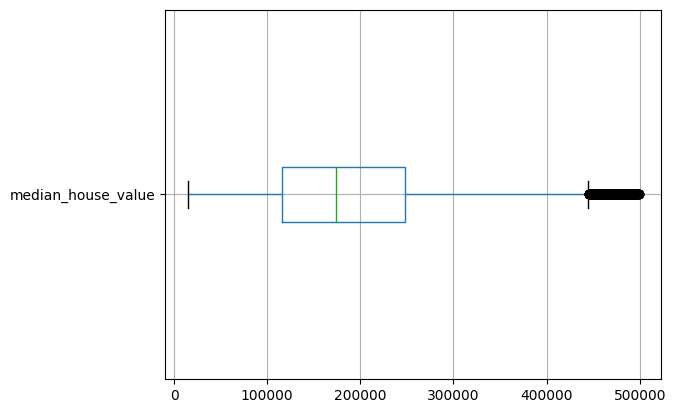

In [ ]:
df_housing[['median_house_value']].boxplot(vert=False)

q1 = df_housing['median_house_value'].quantile(0.25)
q3 = df_housing['median_house_value'].quantile(0.75)

IQR = q3 - q1

lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df_sem_outliers = df_housing[(df_housing['median_house_value'] >= lower_limit) & (df_housing['median_house_value'] <= upper_limit)]
df_sem_outliers.head()

In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19448 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            19448 non-null  float64
 1   latitude             19448 non-null  float64
 2   housing_median_age   19448 non-null  float64
 3   total_rooms          19448 non-null  float64
 4   total_bedrooms       19448 non-null  float64
 5   population           19448 non-null  float64
 6   households           19448 non-null  float64
 7   median_income        19448 non-null  float64
 8   median_house_value   19448 non-null  float64
 9   ocean_proximity      19448 non-null  object 
 10  rooms_per_household  19448 non-null  float64
 11  bedrooms_per_room    19448 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


## 3) Criação de novas features (Opcional)
Análise os dados e verifique a possibilidade de criar features/colunas novas que ajudarão a prever os dados de 'median_house_value'.

In [ ]:
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedrooms_per_room'] = df_housing['total_bedrooms'] / df_housing['total_rooms']

## 4) Preenchimento de Dados Faltantes
Utilizando a estratégia de preenchimento de dados faltantes do Sklearn, crie um novo dataset contendo somente os dados float64 e aplique a técnica para preenchê-los. (SimpleImputer)

In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
df_housing_float64 = df_housing.select_dtypes(include=['float64'])

In [ ]:
df_housing_float64.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096


## 5) Separar dados de Treino e Teste
Utilizando o SKlearn, separe os dados de treino e teste do modelo numa proporção de 80/20, onde 80% são os dados de treino e 20% são os dados de teste. (train_test_split)

In [ ]:
df_train, df_test = train_test_split(df_housing_float64, test_size=0.2, random_state=42)
df_housing_train = df_train.copy()

## 6) Selecionar Labels
Crie um novo dataset, a partir dos dados de treino (df_train), chamado de df_label somente com os dados da nossa variável alvo 'median_house_value'. E outro dataset chamado de df_base retirando a nossa variável alvo.

In [ ]:
df_label = df_housing_train[['median_house_value']].copy()
df_base = df_housing_train.drop('median_house_value', axis=1)


## 7) Variáveis Categóricas
Crie um novo dataset somente com os campos categóricos e aplique nele a técnica/tratamento escolhido. (OrdinalEncoder, OneHotEncoder, dentre outros...)

In [ ]:
df_housing_cat = df_housing[['ocean_proximity']]

In [ ]:
ordinal_encoder = OrdinalEncoder()
df_housing_cat_encoded = ordinal_encoder.fit_transform(df_housing_cat)
df_housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [ ]:
ordinal_encoder.categories_

NameError: name 'ordinal_encoder' is not defined

## 8) Escalonamento de Dados
Escolha uma técnica para escalonar os nossos dados, com o objetivo de queseja melhor aceito pelo algoritmo. (MinMax, Scaling, dentre outros ...)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df_housing_float64)
df_housing_scaled = scaler.transform(df_housing_float64)
df_housing_scaled

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.90394566, 0.04661026,
        0.05176768],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.70956474, 0.04094539,
        0.06199621],
       [0.21015936, 0.5642933 , 1.        , ..., 0.69634436, 0.05651258,
        0.03279558],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.15967949, 0.03310413,
        0.12797003],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.14398029, 0.03404552,
        0.13321386],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.153689  , 0.03347754,
        0.13464991]])

## 9) Pipeline Númerico
Utilizando o Sklearn, crie um pipeline numérico que faça o preenchimento dos dados faltantes e o escalonamento dos dados.

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

## 10) Pipeline Categórico
Utilizando o Sklearn, crie um pipeline categórico que aplique a estratégia escolhida para os dados categóricos.

In [ ]:
num_attribs = list(df_housing_float64.columns)
cat_num_attribs = ["ocean_proximity"]
cat_attribs = ["ocean_proximity"]

## 11) Pipeline Final e Preparação dos Dados
Utilizando o Sklearn, crie um pipeline final que receba ps dados numéricos e categóricos para o tratamento dos dados.

In [ ]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat_num", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

## 12) Dados preparados
Crie um novo dataset com os dados preparados pelo Pipeline

In [ ]:
df_housing_prepared = full_pipeline.fit_transform(df_housing)
df_housing_prepared.shape

(19448, 17)

## 13) Treinamento o Modelo
Treine seus dados utilizando alguns algoritmos de Regressão (LinearRegression, DecisionTreeRegressor, RandomForestRegressor, dentre outros ...)

In [ ]:
df_housing_prepared = df_housing_prepared[:df_label.shape[0], :]

In [ ]:
dados = df_housing.iloc[:10]
labels = df_label.iloc[:10]

dados_preparados = full_pipeline.transform(dados)

In [ ]:
print("predições:", lin_reg.predict(df_housing_prepared))

predições: [[192228.27245275]
 [190612.31737916]
 [192468.91552259]
 ...
 [193947.81214936]
 [192591.12048535]
 [193192.79817   ]]


In [ ]:
print("Reais:", labels.values)

Reais: [[ 97400.]
 [104000.]
 [247000.]
 [302600.]
 [105300.]
 [ 90500.]
 [237500.]
 [225000.]
 [430300.]
 [ 94300.]]


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(df_housing_prepared, df_label)

LinearRegression()

## 14) Validando o Modelo (MAE, RMSE e R²)

Utilize as métricas de regressão MAE, RMSE e R² com o objetivo de encontrar o melhor modelo.

In [ ]:
dados_predictions = lin_reg.predict(dados_preparados)
lin_mse = mean_squared_error(labels, dados_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

109867.23928071526

## 15) Modelo Escolhido
Baseado no modelo que obteve a maior performance, utilize os dados de Treino e Teste (treine o modelo com os dados de treino e teste o modelo com os dados de teste) apresentando os resultados das previsões MAE e RMSE.

In [ ]:
lin_mae = mean_absolute_error(labels, dados_predictions)
lin_mae

95932.72644890528

## 16) Quais variáveis/features ou técnicas utilizadas na criação do modelo influenciaram as métricas de validação MAE, RMSE e R² negativa ou positivamente?

A criação de novas features, exclusão de alguma coluna, a mudança de alguma técnica de escalonamento ou de tratamento das variáveis categóricas podem te ajudar com a resposta.

In [ ]:
#A criação de features na 3 ajuda com mais informações, o ordinal encoder ajudou a representar 'ocean_proximity' (categorica) em formato numérico, facilitando a interpretação
#pelo algoritmo de regressão (LinearRegression)
